In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import os
import calendar as ca

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
files = [file for file in os.listdir('C:\\Users\\ThinkPad\Downloads\Hithub data\Pandas-Data-Science-Tasks\SalesAnalysis\Sales_Data')]
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [3]:
data = pd.DataFrame()

for file in files:
    df = pd.read_csv('C:\\Users\\ThinkPad\Downloads\Hithub data\Pandas-Data-Science-Tasks\SalesAnalysis\Sales_Data/' + file)
    data = pd.concat([data,df])
data.to_csv('data.csv', index = False)

In [4]:
all_data = pd.read_csv("data.csv")

In [5]:
data2 = all_data.dropna(how= 'any')

In [6]:
data2.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [7]:
data2[data2['Order Date'].str.contains('Or')]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
all_data = data2[data2['Order Date'].str.contains('Or') == False]

In [9]:
all_data[all_data['Order Date'].str[0:2] == 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [10]:
all_data['Month'] = all_data['Order Date'].str[0:2].astype(int)
all_data.head()

C:\Users\ThinkPad\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [11]:
all_data["Sale"] = pd.to_numeric(all_data['Quantity Ordered']) * pd.to_numeric(all_data["Price Each"])

C:\Users\ThinkPad\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [13]:
months_sale = all_data.groupby("Month").sum()
months_sale

,Sale
Month,
1,1.822257e+06
2,2.202022e+06
3,2.807100e+06
4,3.390670e+06
5,3.152607e+06
6,2.577802e+06
7,2.647776e+06
8,2.244468e+06
9,2.097560e+06


Text(0, 0.5, 'Sale')

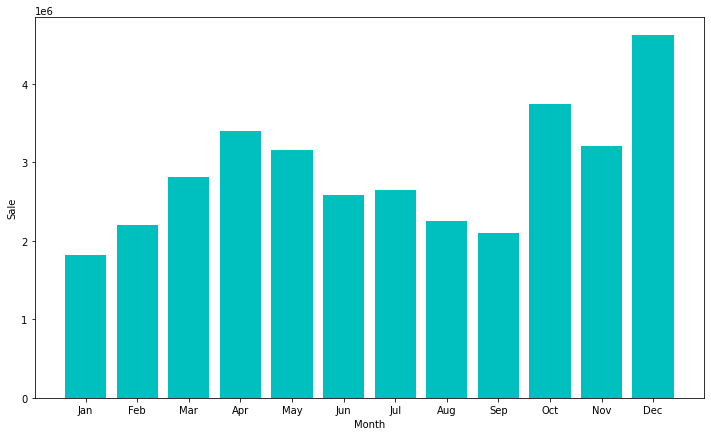

In [14]:
import calendar
months = []
for month in range(1, 13):
    months = months + [calendar.month_abbr[month]]
plt.figure(figsize =(12,7))
plt.bar(months, months_sale["Sale"], color = "c")
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Sale")

In [15]:
def get_state(address):
    return address.split(",")[2]
all_data["City"] = all_data["Purchase Address"].apply(lambda x: x.split(',')[1] +" (" + get_state(x).split(' ')[1] + ")")
all_data["City"].head()

C:\Users\ThinkPad\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0          Dallas (TX)
2          Boston (MA)
3     Los Angeles (CA)
4     Los Angeles (CA)
5     Los Angeles (CA)
Name: City, dtype: object

C:\Users\ThinkPad\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


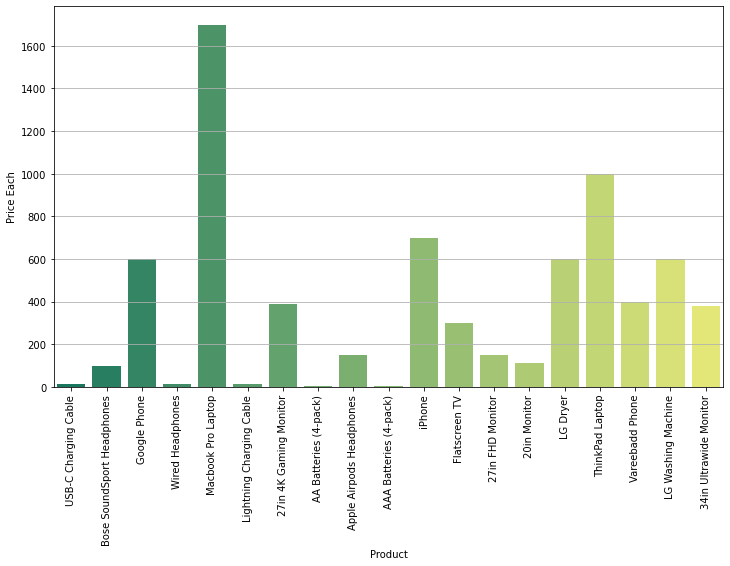

In [16]:
import seaborn as sns
plt.figure(figsize=(12,7))
sns.barplot(all_data["Product"], all_data["Price Each"].astype(float), linewidth = 1, palette = "summer")
plt.xticks(rotation = "vertical")
plt.grid(True, axis = 'y')


In [17]:
all_data["Price Each"] = all_data["Price Each"].astype(float)
all_data["Quantity Ordered"] = all_data["Quantity Ordered"].astype(int)

C:\Users\ThinkPad\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ThinkPad\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
city_sale = all_data.groupby('City').sum()
city_sale

,Quantity Ordered,Price Each,Month,Sale
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


C:\Users\ThinkPad\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Sale')

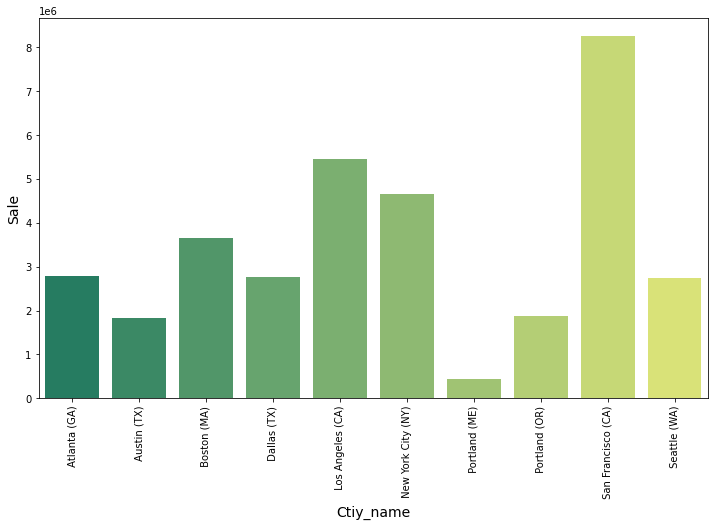

In [19]:
cities = [city for city, df in all_data.groupby("City")]
plt.figure(figsize = (12,7))
sns.barplot(cities, city_sale["Sale"], palette = "summer")
plt.xticks(rotation = "vertical")
plt.xlabel("Ctiy_name", size = 14)
plt.ylabel("Sale", size  = 14)

In [20]:
df = all_data[all_data["Order ID"].duplicated(keep =False)]
df = df.groupby("Order ID")["Product"].transform(lambda x:",".join(x))

In [21]:
df.drop_duplicates()

3                             Google Phone,Wired Headphones
18                        Google Phone,USB-C Charging Cable
30        Bose SoundSport Headphones,Bose SoundSport Hea...
32                      AAA Batteries (4-pack),Google Phone
119           Lightning Charging Cable,USB-C Charging Cable
                                ...                        
173856                      LG Dryer,27in 4K Gaming Monitor
174201    Google Phone,USB-C Charging Cable,Wired Headph...
176840                    LG Dryer,Lightning Charging Cable
177793                             ThinkPad Laptop,LG Dryer
180004             LG Washing Machine,AA Batteries (4-pack)
Name: Product, Length: 366, dtype: object

In [22]:
prices = all_data.groupby("Product").mean()["Price Each"]
product_group = all_data.groupby("Product")
products = [product for product, df in all_data.groupby("Product")]
quantity_ordered = product_group.sum()['Quantity Ordered']
total_sale = product_group.sum()["Sale"]


C:\Users\ThinkPad\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


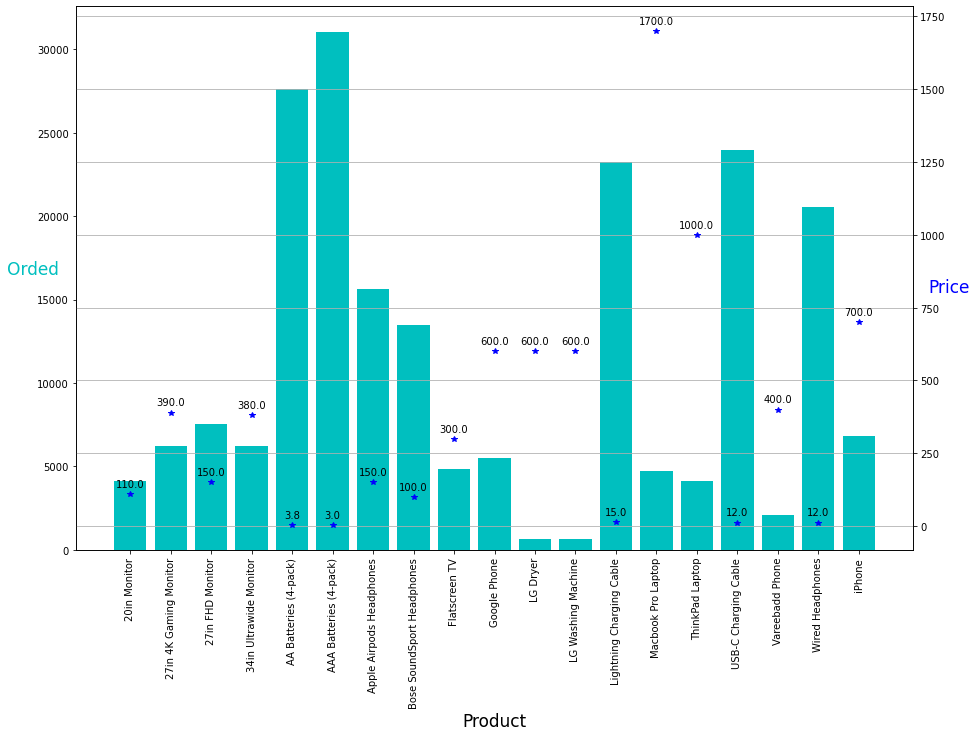

In [23]:
fig, ax1 = plt.subplots(figsize = (15,10))

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = "c")
ax2.plot(products, prices, 'b*', ds = 'steps-mid')

ax1.set_xlabel('Product', size = 17)
ax1.set_ylabel('Orded', color='c', size = 17, rotation = 'horizontal')
ax2.set_ylabel('Price', color='b', size = 17, rotation = 'horizontal')
ax1.set_xticklabels(products, rotation = "vertical")


line = ax2.lines[0]
for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.1f}".format(y_value)
            ax2.annotate(label,(x_value, y_value), xytext=(0,5), 
                textcoords="offset points", ha='center', va='bottom')   


plt.grid(True)
plt.show()

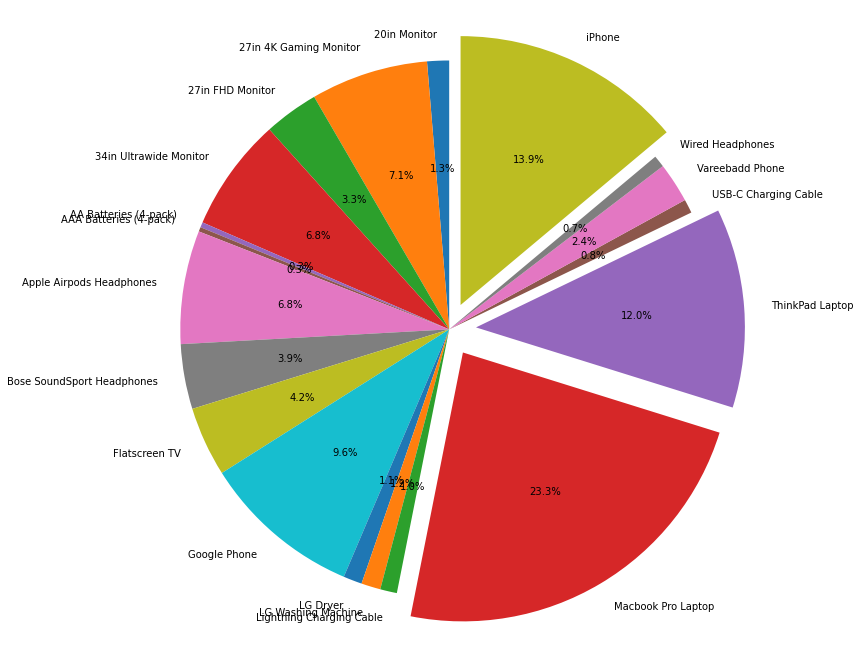

In [24]:
per_sale = product_group.agg({"Sale":"sum"})
per = per_sale["Sale"].apply(lambda x: 100* x / per_sale["Sale"].sum())
explode = per.apply(lambda x: 0.1 if x > 10 else 0)
fig1, ax1 = plt.subplots(figsize = (12,12))
ax1.pie(per,explode = explode, autopct='%1.1f%%',labels = products,
        shadow=False, startangle=90, radius = 1)
ax1.axis('equal')

plt.show()